# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
pip install pandas requests beautifulsoup4  matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests

# URL of the page to scrape
url = 'https://www.mlb.com/stats/san-francisco-giants/all-time-by-season'

# Download the HTML
response = requests.get(url)
html_content = response.text

In [4]:
from bs4 import BeautifulSoup
import pandas as pd

# Parse the HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Find all tables
tables = soup.find_all('table')

# Assuming the first table is the one with all-time stats
stats_table = tables[0]  # Adjust if necessary



In [5]:
# Extract the header
headers = []
headers = [header.text.strip() for header in stats_table.find_all('abbr', class_="bui-text cellheader bui-text")]
print (headers)

['PLAYER', 'PLAYER', 'YEAR', 'YEAR', 'TEAM', 'TEAM', 'G', 'G', 'AB', 'AB', 'R', 'R', 'H', 'H', '2B', '2B', '3B', '3B', 'HR', 'HR', 'RBI', 'RBI', 'BB', 'BB', 'SO', 'SO', 'SB', 'SB', 'CS', 'CS', 'AVG', 'AVG', 'OBP', 'OBP', 'SLG', 'SLG']


In [6]:
from collections import OrderedDict 
headers = list (OrderedDict.fromkeys(headers))

In [7]:
# Extract the rows
rows = []
for row in stats_table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all('td')
    if cells:  # Ensure the row has data
        rows.append([cell.text.strip() for cell in cells])

# Create a DataFrame
df = pd.DataFrame(rows, columns=headers)

In [8]:
# Clean the DataFrame
df.replace({'\$': '', ',': ''}, regex=True, inplace=True)  # Remove $ and commas
df.dropna(inplace=True)  # Remove empty rows


In [9]:
import sqlite3

# Create a database connection
conn = sqlite3.connect('giants_stats.db')

# Create a new table
df.to_sql('all_time_stats', conn, if_exists='replace', index=False)

# Commit and close the connection
conn.commit()
conn.close()

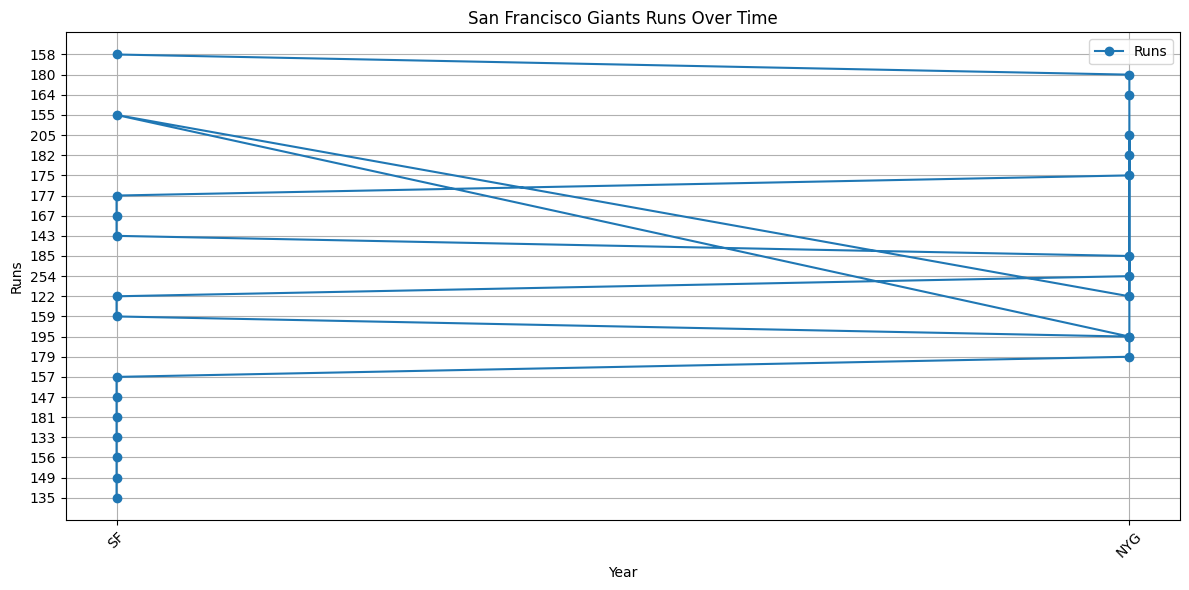

In [10]:
if 'R' in df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df['YEAR'], df['R'], marker='o', label='Runs')
    plt.title('San Francisco Giants Runs Over Time')
    plt.xlabel('Year')
    plt.ylabel('Runs')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Column 'R' (Runs) does not exist in the DataFrame.")